In [6]:
import pandas as pd

# Load the dataset make sure to have the file in same folder
df = pd.read_csv("heart.csv")

# Preview the first few rows
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Shape of dataset
print("Shape of dataset:", df.shape)

# Info about data types and null values
df.info()


Shape of dataset: (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Null values in each column
print("\nMissing values:\n", df.isnull().sum())

# Unique values in each column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")



Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Unique values per column:
Age: 50
Sex: 2
ChestPainType: 4
RestingBP: 67
Cholesterol: 222
FastingBS: 2
RestingECG: 3
MaxHR: 119
ExerciseAngina: 2
Oldpeak: 53
ST_Slope: 3
HeartDisease: 2


In [9]:
# Statistical summary for numeric features
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


correlation matrix

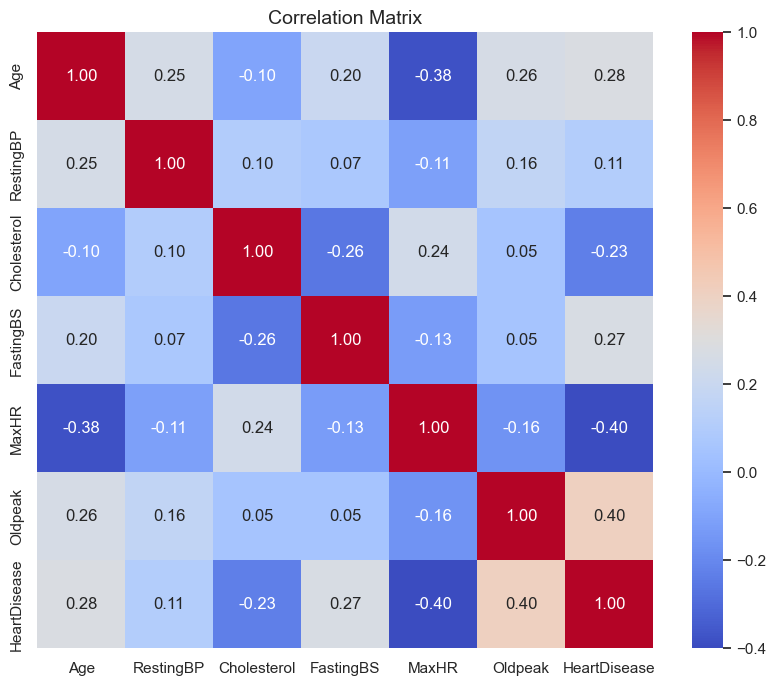

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Calculate correlation matrix
corr = df.select_dtypes(include=['number']).corr()


# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=14)
plt.show()


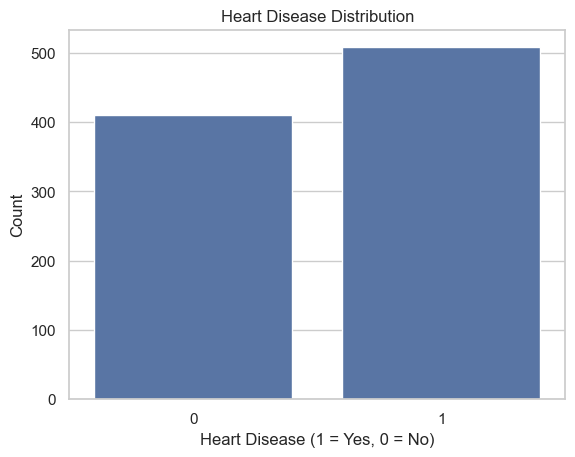

In [14]:
sns.countplot(x="HeartDisease", data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


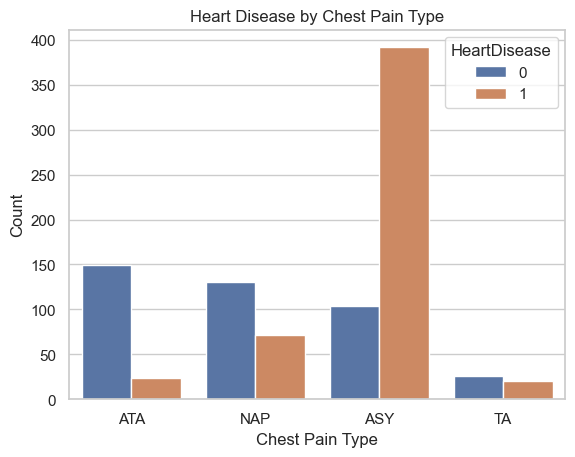

In [16]:
sns.countplot(x="ChestPainType", hue="HeartDisease", data=df)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

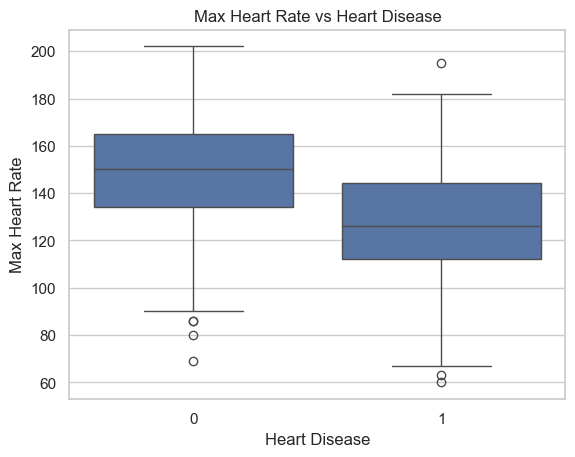

In [17]:
sns.boxplot(x="HeartDisease", y="MaxHR", data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Max Heart Rate")
plt.show()


preprocessing

In [18]:
df.dtypes


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [23]:
df["Sex"] = df["Sex"].map({'M': 1, 'F': 0})


In [24]:
df_encoded = pd.get_dummies(
    df,
    columns=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
    drop_first=True
)



In [25]:
from sklearn.model_selection import train_test_split

# X = features, y = target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


training and visualizing decision tree


In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)  # Creates the model
clf.fit(X_train, y_train)  # Trains the model


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_pred = clf.predict(X_test)


In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 0.7663043478260869

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        82
           1       0.77      0.83      0.80       102

    accuracy                           0.77       184
   macro avg       0.77      0.76      0.76       184
weighted avg       0.77      0.77      0.76       184


Confusion Matrix:
 [[56 26]
 [17 85]]
1.0


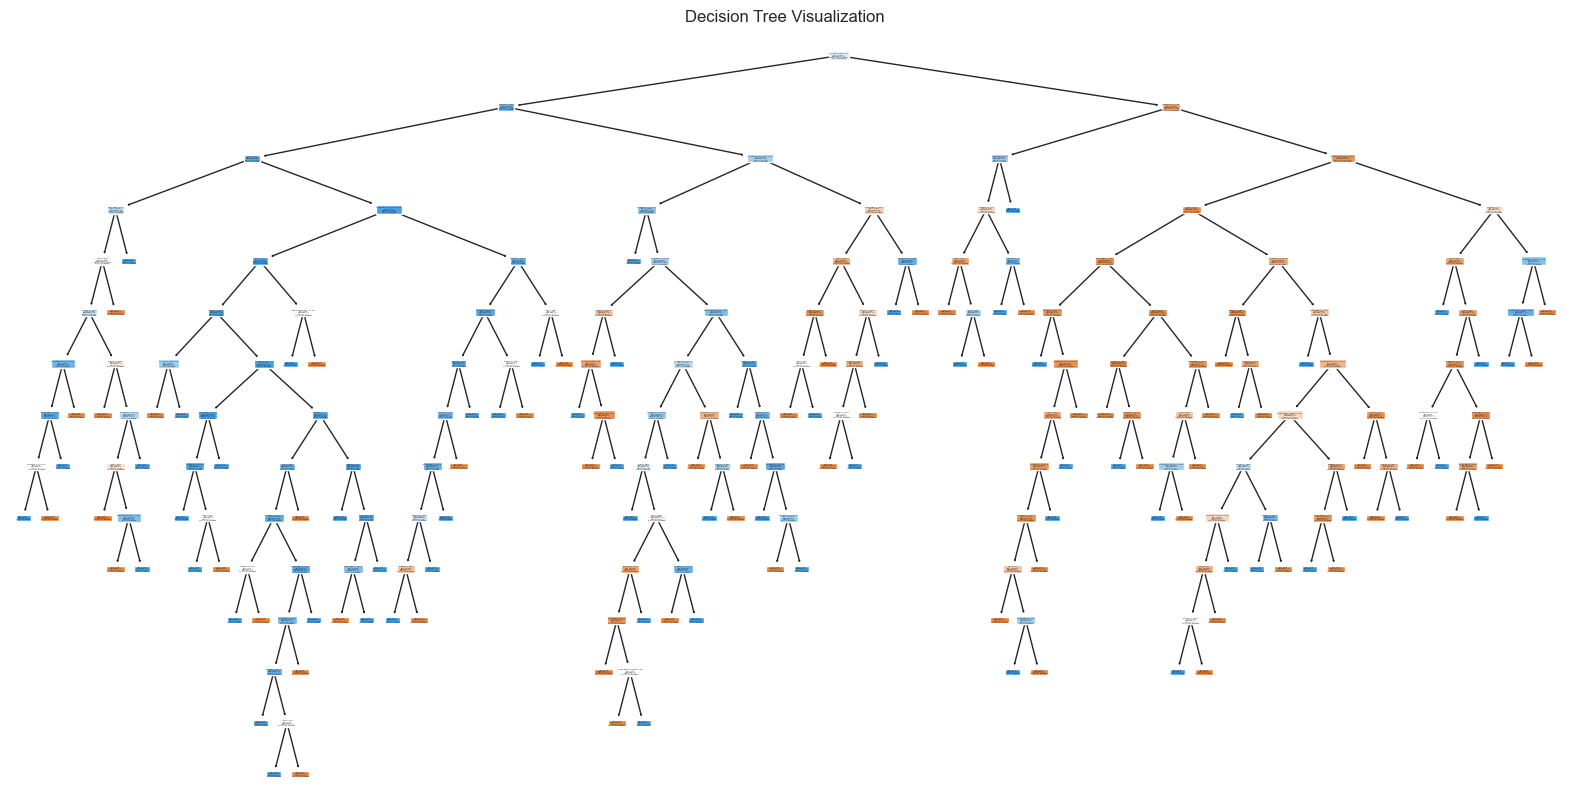

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


hyperparameter tuning , pre-pruning the tree

In [31]:
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Initialize base tree
dt = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid = GridSearchCV(estimator=dt, param_grid=param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1, verbose=5)

# Fit grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,5
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [36]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated Score: 0.8268940452893485


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8152173913043478

Confusion Matrix:
 [[68 14]
 [20 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        82
           1       0.85      0.80      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



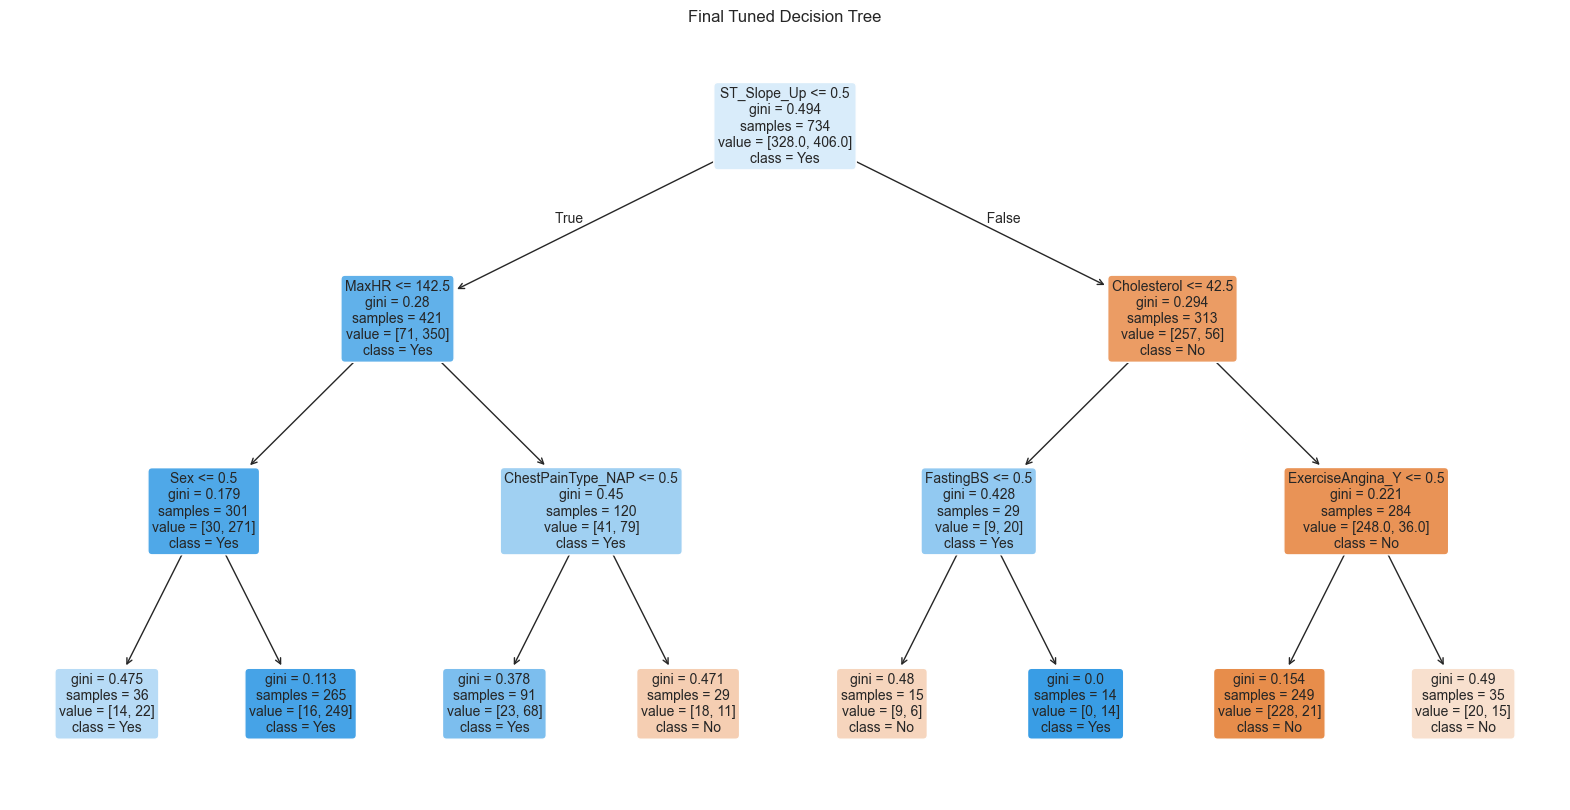

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=['No', 'Yes'],  # Change if your classes differ
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Final Tuned Decision Tree")
plt.show()


In [43]:
import pandas as pd
import numpy as np

# Get feature importances
importances = best_model.feature_importances_
features = X.columns

# Put into DataFrame and sort
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print(feat_imp_df)


              Feature  Importance
14        ST_Slope_Up    0.746126
3         Cholesterol    0.081400
5               MaxHR    0.049056
12   ExerciseAngina_Y    0.035502
1                 Sex    0.033395
8   ChestPainType_NAP    0.029068
4           FastingBS    0.025452
6             Oldpeak    0.000000
2           RestingBP    0.000000
0                 Age    0.000000
7   ChestPainType_ATA    0.000000
10  RestingECG_Normal    0.000000
9    ChestPainType_TA    0.000000
11      RestingECG_ST    0.000000
13      ST_Slope_Flat    0.000000
